<!--BOOK_INFORMATION-->
<a href="https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv" target="_blank"><img align="left" src="data/cover.jpg" style="width: 76px; height: 100px; background: white; padding: 1px; border: 1px solid black; margin-right:10px;"></a>
*This notebook contains an excerpt from the upcoming book [Machine Learning for OpenCV](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv) by Michael Beyeler (expected Aug 2017).
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [Preprocessing Data](04.01-Preprocessing-Data.ipynb) | [Contents](../README.md) | [Representing Categorical Variables](04.03-Representing-Categorical-Variables.ipynb) >

# Reducing the Dimensionality of the Data

The *curse of dimensionality*: The number of data points needed to fill the available space grows exponentially with the number of dimensions.

In practice, the curse of dimensionality means that for a given
sample size, there is a maximum number of features above which the performance of our classifier will
degrade rather than improve.

That's why you often want to reduce the dimensionality of your data.

## Implementing Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that is helpful whenever we are dealing with
high-dimensional data. 

What PCA does is rotate all data points until the data lie aligned with the two axes (the two
inset vectors) that explain most of the spread of the data. PCA considers these two axes to
be the most informative, because if you walk along them, you can see most of the data
points separated. In more technical terms, PCA aims to transform the data to a new
coordinate system by means of an orthogonal linear transformation. The new coordinate
system is chosen such that if you project the data onto these new axes, the first coordinate
(called the first principal component) observes the greatest variance.

Let's have a look at some random data drawn from a multivariate Gaussian:

In [1]:
import numpy as np
mean = [20, 20]
cov = [[5, 0], [25, 25]]
np.random.seed(42)
x, y = np.random.multivariate_normal(mean, cov, 1000).T

We can plot this data using Matplotlib:

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

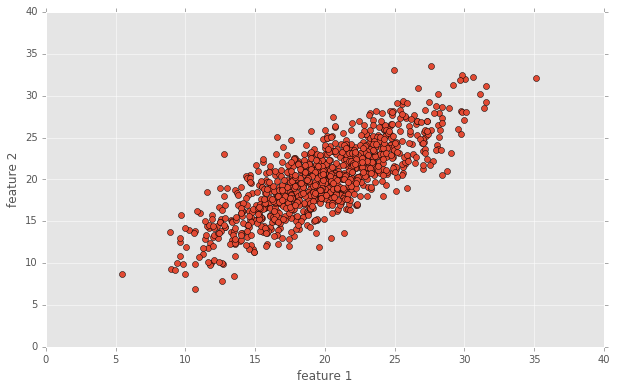

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In order to compute the principal components, we need to stack the `x` and `y` coordinates:

In [4]:
X = np.vstack((x, y)).T

Then we can compute PCA on the feature matrix `X`. We also specify an empty array `np.array([])` for the
mask argument, which tells OpenCV to use all data points in the feature matrix:

In [5]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.71481632,  0.69931225],
       [-0.69931225,  0.71481632]])

Let's plot the eigenvectors of the decomposition on top of the data:

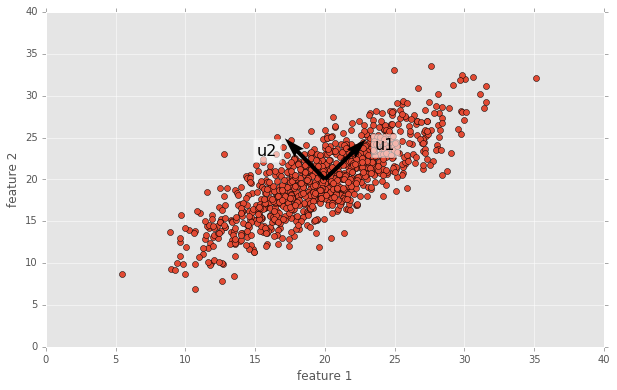

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

We said PCA rotates the data so that the two axes (`x` and `y`) are aligned with the first two principal components:

In [7]:
X2 = cv2.PCAProject(X, mu, eig)

If we plot this, we should see the blob of data rotated so that the most spread is along the `x` axis:

[-20, 20, -10, 10]

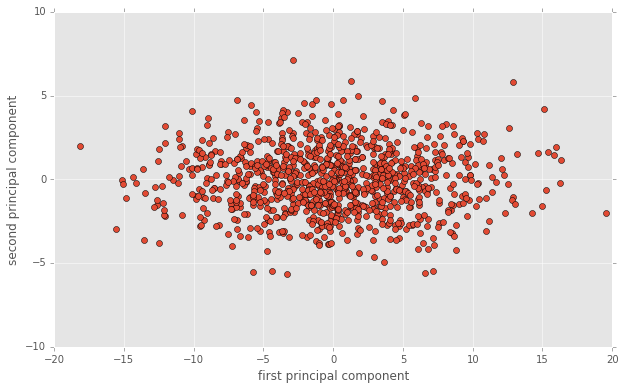

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

## Implementing Independent Component Analysis (ICA)

OpenCV doesn't have an implementation of ICA, but Scikit-Learn does:

In [9]:
from sklearn import decomposition

Like all other optimizers, first instantiate, then use the `fit_transform` method:

In [10]:
ica = decomposition.FastICA()

In [11]:
X2 = ica.fit_transform(X)

C:\Users\mbeyeler\Miniconda3\envs\OpenCVML\lib\site-packages\sklearn\decomposition\fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


We can plot the projected data on the first two independent components:

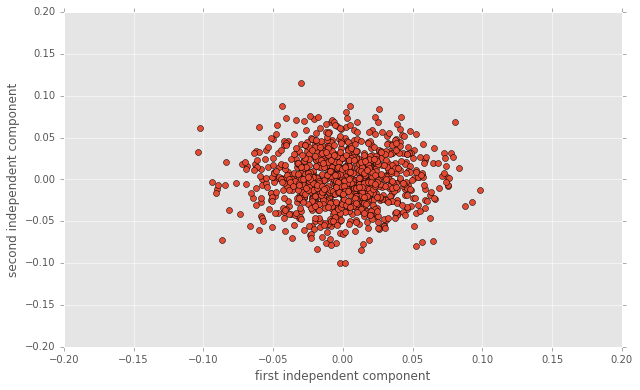

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])
plt.savefig('ica.png')

## Implementing Non-Negative Matrix Factorization (NMF)

OpenCV doesn't provide an implementation of NMF, but Scikit-Learn does:

In [13]:
nmf = decomposition.NMF()

In [14]:
X2 = nmf.fit_transform(X)

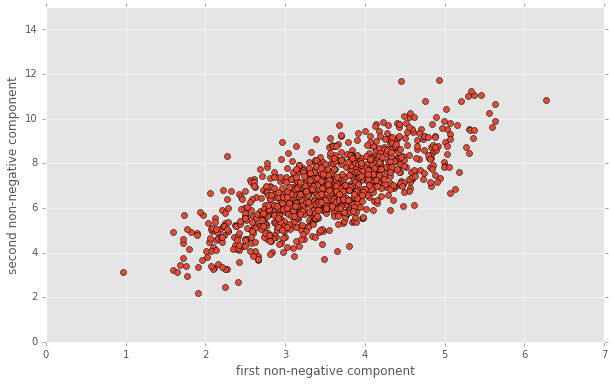

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([0, 7, -0, 15])
plt.savefig('nmf.png')

<!--NAVIGATION-->
< [Preprocessing Data](04.01-Preprocessing-Data.ipynb) | [Contents](../README.md) | [Representing Categorical Variables](04.03-Representing-Categorical-Variables.ipynb) >